## __Tarea 1__

### Daniela Díaz Mora
#### 201710003-6

El instrumento consiste en 40 preguntas clasificadas en 4 categor´ıas. Estas categor´ıas tienen relaci´on con los 4 cursos remediales que se ofrece a aquellos estudiantes que obtienen un puntaje menor a 620 puntos. El porcentaje de respuestas
acertadas en cada categor´ıa se encuentra en la base de datos con los nombres R1,
R2, R3 y R4. ¿Es razonable asumir una distribuci´on normal multivariada para
modelar las variables R1, R2, R3 y R4?##### __Problema 1__

Considere el conjunto de datos diag2010.txt. En este problema se analizará las variables Mate:Puntaje en la parte matemática de la PSU de los alumnos de primer año de la USM, y la variable Calculo: puntaje en la prueba de diagnóstico aplicada a los estudiantes de primer año en la USM el año 2010.

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv('diag2010.txt', sep = "\t")

In [3]:
data

,PSU,LC,Mate,NEM,OC,OH,Buenas,Malas,Omitidas,Nota,Calculo,R1,R2,R3,R4
0,669.80,710,678.0,620.0,677.0,0.0,29,6,5,731,731,69.2,92.3,62.5,50.0
1,667.40,674,756.0,496.0,684.0,0.0,31,1,8,762,762,84.6,53.8,87.5,100.0
2,693.80,659,718.0,682.0,684.0,0.0,27,6,7,712,712,84.6,46.2,75.0,66.7
3,669.65,576,682.0,723.0,668.0,0.0,25,10,5,683,683,61.5,61.5,50.0,83.3
4,666.55,582,682.0,723.0,625.0,0.0,33,6,1,769,769,84.6,84.6,75.0,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2176,697.55,651,774.0,599.0,693.0,0.0,30,6,4,740,740,84.6,76.9,62.5,66.7
2177,697.35,721,701.0,702.0,622.0,564.0,23,6,11,674,674,92.3,53.8,37.5,16.7
2178,663.30,682,648.0,682.0,614.0,0.0,22,8,10,660,660,46.2,46.2,62.5,83.3
2179,662.05,639,706.0,599.0,668.0,0.0,19,8,13,631,631,38.5,38.5,50.0,83.3


In [4]:
#quitar espacios del header que tenian  en el txt
data.columns=['PSU', 'LC', 'Mate', 'NEM','OC','OH', 'Buenas', 'Malas', 'Omitidas',
       'Nota', 'Calculo', 'R1', 'R2', 'R3', 'R4']

In [5]:
#vamos a quitar las filas que tienen valores nulos en Mate o Calculo
aux=data[['Mate','Calculo']]
aux=aux.dropna()
aux

,Mate,Calculo
0,678.0,731
1,756.0,762
2,718.0,712
3,682.0,683
4,682.0,769
...,...,...
2176,774.0,740
2177,701.0,674
2178,648.0,660
2179,706.0,631


In [6]:

mate=aux['Mate']
calc=aux['Calculo']

##### __a)__ Haga un análisis descriptivo de ambas variables por separado.

In [7]:
mate.describe()

count    2119.000000
mean      702.760264
std        54.140935
min       521.000000
25%       664.000000
50%       694.000000
75%       737.000000
max       850.000000
Name: Mate, dtype: float64

In [8]:
calc.describe()

count    2119.000000
mean      685.181218
std        67.413094
min       489.000000
25%       638.000000
50%       686.000000
75%       733.000000
max       850.000000
Name: Calculo, dtype: float64

In [9]:
import matplotlib.pyplot as plt

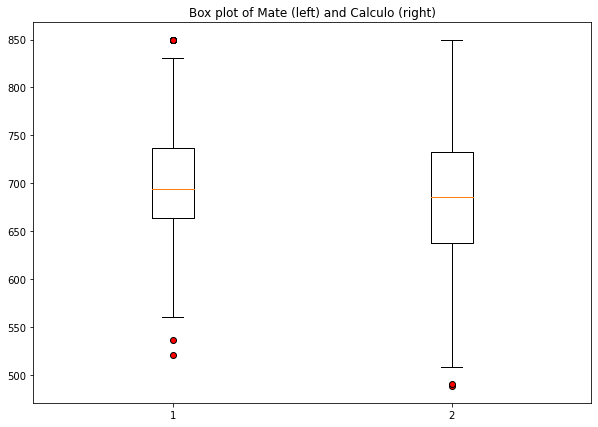

In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
  
  
# Creating dataset
np.random.seed(10)
  
fig= plt.figure(figsize =(10, 7))

red = dict(markerfacecolor='r', marker='o')
# Creating plot
plt.boxplot(aux, flierprops=red)
plt.title('Box plot of Mate (left) and Calculo (right)')
# show plot
plt.show()

##### __b)__ ¿Es razonable asumir normalidad para cada variable? Justifique.

In [11]:
import statsmodels.api as sm
import scipy.stats as stats
import pylab

##### __QQplot Mate__

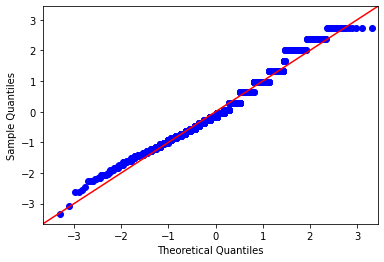

In [12]:
sm.qqplot(mate,line='45',fit=True)
pylab.show()

##### __QQplot Calculo__

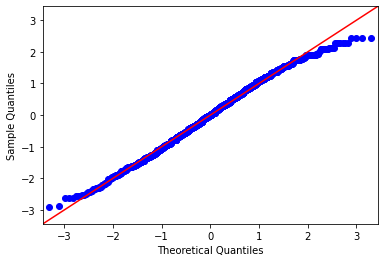

In [13]:
sm.qqplot(calc,line='45',fit=True)
pylab.show()

##### __d)__ Ajuste una distribución bivariada a los datos. Estime la media y la matriz de covarianzas.

In [18]:
xbar=aux.mean().to_numpy()

In [19]:
xbar

array([702.76026428, 685.18121756])

In [20]:
sigma=np.cov(aux.T)

In [21]:
sigma

array([[2931.24089436, 2561.4726433 ],
       [2561.4726433 , 4544.52521835]])

$$\hat{\mu}=\begin{pmatrix}702.76 & 685.18\end{pmatrix}^T \qquad \hat{\Sigma}=\begin{pmatrix}2931.24 & 2561.47 \\ 2561.47 & 4544.53\end{pmatrix}$$

##### __e)__ Haga inferencia para el coeficiente de correlación entre las variables. Comente. ¿Existe correlación significativa entre la prueba de diagnóstico aplicada en la USM y la parte matemática de la PSU? Proponga un modelo para explicar una variable como función de la otra.


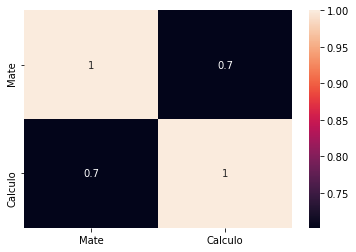

In [29]:
import seaborn as sns
sns.heatmap(aux.corr(),annot=True);

##### dado que la correlación es lo suficientemente cercana a 1 asumiremos que hay una relación lineal positiva, realizando el ajuste y considerando como variabre regreso 'Mate' se tiene que

In [54]:
model=np.polyfit(mate,calc,1)
model

array([ 0.87385266, 71.07229351])

$$calculo=0.8739\cdot mate +71.07$$

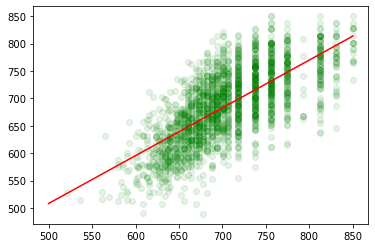

In [58]:
plt.scatter(mate,calc,alpha=0.1,c='g')
plt.plot(np.array([500,850]),np.array([500,850])*model[0]+model[1],c='r')
plt.show()

##### __f__  ¿Existen Outiers multivariados en la muestra? Justifique.

In [15]:
covariance  = np.cov(df , rowvar=False)
covariance_pm1 = np.linalg.matrix_power(covariance, -1)
centerpoint = np.mean(df , axis=0)

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

df = aux
df = df.to_numpy()

In [16]:
distances = []
for i, val in enumerate(df):
      p1 = val
      p2 = centerpoint
      distance = (p1-p2).T.dot(covariance_pm1).dot(p1-p2)
      distances.append(distance)
distances = np.array(distances)
cutoff = chi2.ppf(0.95, df.shape[1])
outlierIndexes = np.where(distances > cutoff )


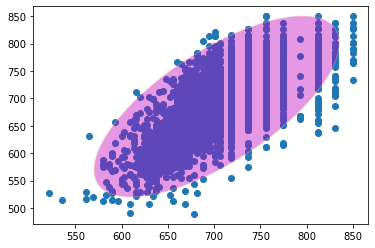

In [17]:
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
ell_radius_x = np.sqrt(1 + pearson)
ell_radius_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(covariance)
lambda_ = np.sqrt(lambda_)

ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]),
                  width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2,
                  angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('m')
ellipse.set_alpha(0.4)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

__los otliers multivariados son los que estan afuera de la elipse la cual representa la distancia de mahalanobis__

In [61]:
print('los outliers son \n',outlierIndexes)

los outliers son 
 (array([  77,  136,  137,  266,  288,  292,  295,  319,  387,  401,  479,
        480,  490,  492,  496,  497,  507,  551,  552,  620,  628,  635,
        670,  730,  743,  835,  842,  870,  871,  885,  921,  931,  997,
       1029, 1042, 1048, 1060, 1066, 1074, 1076, 1103, 1114, 1117, 1123,
       1141, 1152, 1159, 1176, 1177, 1183, 1190, 1203, 1215, 1216, 1224,
       1227, 1264, 1327, 1360, 1395, 1412, 1416, 1432, 1436, 1462, 1463,
       1476, 1489, 1545, 1583, 1584, 1594, 1604, 1633, 1705, 1714, 1750,
       1757, 1784, 1791, 1799, 1833, 1837, 1840, 1852, 1888, 1893, 1912,
       1925, 1977, 1998, 2025, 2042, 2076, 2095, 2096, 2097, 2100, 2105]),)


##### __g)__ El instrumento consiste en 40 preguntas clasificadas en 4 categorías. Estas categorías tienen relación con los 4 cursos remediales que se ofrece a aquellos estudiantes que obtienen un puntaje menor a 620 puntos. El porcentaje de respuestas acertadas en cada categoría se encuentra en la base de datos con los nombres R1, R2, R3 y R4. ¿Es razonable asumir una distribución normal multivariada para modelar las variables R1, R2, R3 y R4?

In [26]:
categorias=data[['R1','R2','R3','R4']].dropna()

In [27]:
categorias

,R1,R2,R3,R4
0,69.2,92.3,62.5,50.0
1,84.6,53.8,87.5,100.0
2,84.6,46.2,75.0,66.7
3,61.5,61.5,50.0,83.3
4,84.6,84.6,75.0,83.3
...,...,...,...,...
2176,84.6,76.9,62.5,66.7
2177,92.3,53.8,37.5,16.7
2178,46.2,46.2,62.5,83.3
2179,38.5,38.5,50.0,83.3
